In [1]:
import os
os.chdir("..")

from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from tuxai.dataset import Dataset, Columns
from tuxai.misc import config_logger
from tuxai.report import model_metrics, Report, FeatureImportanceReport

config_logger()
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100

fir = FeatureImportanceReport(use_cache="fi_const_2022_12_21")


2022-12-20 16:34:12,471 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2022_12_21


In [2]:
# from tuxai.misc import cache
# c = cache()
# key = "fir_2022_12_21"
# # del c[key]
# if key in c:
#     fir = c[key]
# else:
#     fir = FeatureImportanceReport()
#     c[key] = fir


## Which options are importants, regardless of version? (always < top 30)

## 1 - no compression, with collinearity

In [3]:
fir.options_always_importants(target="vmlinux", rank=30, collinearity=True)

  0%|          | 0/7242 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
27,nb_yes,0,1,1,0,0,0,0
21,"RANDOMIZE_BASE, X86_NEED_RELOCS",<NA>,0,0,1,1,1,1
20,RANDOMIZE_BASE,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,DEBUG_INFO,2,2,3,2,3,3,2
1,"AMD_MEM_ENCRYPT, DMA_COHERENT_POOL, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3
15,"KASAN_OUTLINE, KASAN",4,3,2,<NA>,<NA>,<NA>,<NA>
14,"KASAN_GENERIC, KASAN_OUTLINE, KASAN",<NA>,<NA>,<NA>,3,2,4,<NA>
0,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,5,2,<NA>
24,UBSAN_SANITIZE_ALL,3,4,4,4,4,8,8
7,DEBUG_INFO_REDUCED,5,5,5,5,6,5,5


## 2 - with compression, with collinearity

In [4]:

fir.options_always_importants(target="BZIP2-vmlinux", rank=30, collinearity=True)


  0%|          | 0/7257 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
25,nb_yes,0,1,0,1,0,0,0
11,"KASAN_OUTLINE, KASAN",1,0,1,<NA>,<NA>,<NA>,<NA>
10,"KASAN_GENERIC, KASAN_OUTLINE, KASAN",<NA>,<NA>,<NA>,0,1,1,<NA>
22,UBSAN_SANITIZE_ALL,2,3,3,2,3,2,1
7,GCOV_PROFILE_ALL,3,2,2,3,2,5,3
12,KCOV_INSTRUMENT_ALL,4,5,5,4,6,3,2
8,IKHEADERS,<NA>,<NA>,<NA>,<NA>,5,4,5
16,"RANDOMIZE_BASE, X86_NEED_RELOCS",<NA>,4,4,5,4,7,6
19,UBSAN_ALIGNMENT,5,6,6,6,7,6,4
15,RANDOMIZE_BASE,6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## 3 - with compression, without collinearity : collinear options are lost

In [5]:
fir.options_always_importants(target="BZIP2-vmlinux", rank=30, collinearity=False)

  0%|          | 0/6811 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
18,nb_yes,0,1,0,1,0,0,0
7,KASAN,1,0,1,0,1,1,<NA>
15,UBSAN_SANITIZE_ALL,2,3,3,2,3,3,1
5,GCOV_PROFILE_ALL,3,2,2,3,2,5,5
6,IKHEADERS,<NA>,<NA>,<NA>,<NA>,5,2,4
8,KCOV_INSTRUMENT_ALL,6,5,5,5,6,4,2
10,RANDOMIZE_BASE,5,4,4,4,4,6,7
12,UBSAN_ALIGNMENT,4,6,6,6,7,7,3
9,PRINTK,7,7,8,7,9,10,8
0,BINARY_PRINTF,11,10,7,8,8,9,6


## Which options are NEVER importants, regardless of version? (always > top N)

## 1 - no compression

In [6]:
df = fir.options_never_importants(target="vmlinux", rank=300, collinearity=True)
df

  0%|          | 0/7242 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
1887,I2C_ROBOTFUZZ_OSIF,<NA>,<NA>,<NA>,<NA>,<NA>,2191,<NA>
1902,I2C_XLR,<NA>,<NA>,<NA>,<NA>,<NA>,2188,<NA>
1927,IDLE_INJECT,<NA>,<NA>,<NA>,<NA>,<NA>,2181,<NA>
1932,IEEE802154_AT86RF230_DEBUGFS,<NA>,<NA>,<NA>,2166,<NA>,2179,<NA>
2379,LCD_OTM3225A,<NA>,<NA>,<NA>,2171,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
4634,SPEAKUP_SYNTH_DUMMY,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,304
4709,STRICT_DEVMEM,<NA>,<NA>,<NA>,<NA>,<NA>,303,<NA>
868,CRYPTO_AEGIS128L,<NA>,<NA>,302,<NA>,<NA>,<NA>,<NA>
930,CRYPTO_LIB_CHACHA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,301


In [7]:
df.dropna()

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
365,BEFS_FS,1096,433,1526,1567,468,486,1569


  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7242 [00:00<?, ?it/s]

<AxesSubplot: xlabel='rank', ylabel='options'>

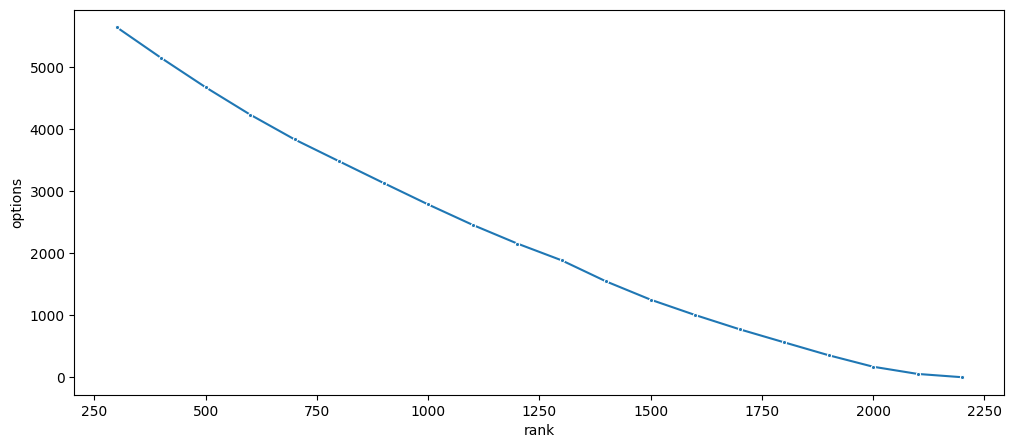

In [43]:
feature_by_rank = {rank: len(fir.options_never_importants(target="vmlinux", rank=rank, collinearity=True)) for rank in range(300, 2300, 100)}
fig, ax =plt.subplots(figsize=(12, 5))
sns.lineplot(
    pd.DataFrame.from_dict(feature_by_rank, orient="index").reset_index().rename(columns={"index": "rank", 0:"options"}),
    x="rank",
    y="options",
    marker="."
)


## 2 - with compression

In [8]:
df = fir.options_never_importants(target="BZIP2-vmlinux", rank=300, collinearity=True)
df

  0%|          | 0/7257 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
2044,I2C_MLXCPLD,<NA>,<NA>,<NA>,<NA>,<NA>,2124,<NA>
2048,I2C_MUX_GPIO,<NA>,<NA>,<NA>,<NA>,<NA>,2123,<NA>
2055,I2C_MV64XXX,<NA>,<NA>,<NA>,<NA>,<NA>,2122,<NA>
2062,I2C_PNX,<NA>,<NA>,<NA>,<NA>,<NA>,2118,<NA>
2063,I2C_QCOM_GENI,<NA>,<NA>,<NA>,<NA>,<NA>,2117,<NA>
...,...,...,...,...,...,...,...,...
3694,PM_SLEEP_DEBUG,<NA>,<NA>,<NA>,<NA>,304,<NA>,<NA>
3763,PWM_FSL_FTM,<NA>,<NA>,<NA>,<NA>,303,<NA>,<NA>
1621,FB_TFT_S6D1121,<NA>,<NA>,303,<NA>,<NA>,<NA>,<NA>
1593,FB_RIVA_BACKLIGHT,<NA>,301,<NA>,<NA>,<NA>,<NA>,<NA>


In [9]:
df.dropna()

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
2715,MAX11100,1383,364,438,431,1618,1696,1988


# Options not always importants (stop or start beeing important)
trying some parameters

In [11]:
fir.options_not_always_importants(target="vmlinux", best_rank=30, worst_rank=300, collinearity=True)

  0%|          | 0/6938 [00:00<?, ?it/s]

,options,4.13,4.20,5.00,5.04,5.07,5.08
1,DEBUG_RWSEMS,<NA>,26,28,1293,250,288
2,EROFS_FS,<NA>,<NA>,1425,33,44,25
0,DEBUG_KMEMLEAK,936,<NA>,1302,16,20,14


In [44]:
fir.options_not_always_importants(target="BZIP2-vmlinux", best_rank=30, worst_rank=300, collinearity=True)

  0%|          | 0/6903 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
2,IIO_ADIS_LIB,27,57,34,37,38,537,53
0,BPF_SYSCALL,<NA>,459,95,95,61,60,25
1,GENERIC_TRACER,19,13,308,<NA>,255,<NA>,332


In [45]:
fir.options_not_always_importants(target="vmlinux", best_rank=50, worst_rank=500, collinearity=True)

  0%|          | 0/6938 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
27,XPS,52,46,56,35,153,1008,210
0,AC97_BUS,322,529,402,131,43,153,279
12,GFS2_FS,1427,61,90,34,136,57,64
24,SND_SOC_WM5110,41,154,218,1208,55,178,80
18,"NET_RX_BUSY_POLL, NET, NLATTR",39,79,93,77,1602,64,45
21,SND_HDA_CORE,57,43,40,<NA>,<NA>,392,953
19,SG_POOL,136,72,450,48,51,1110,257
22,SND_SOC_RT5670,66,42,1214,<NA>,<NA>,187,66
26,XFRM_ALGO,104,194,49,242,831,86,722
16,"LOCKD, SUNRPC, GRACE_PERIOD",130,48,72,40,112,1670,222


In [51]:
fir.options_not_always_importants(target="vmlinux", best_rank=100, worst_rank=2000, collinearity=True)

  0%|          | 0/6938 [00:00<?, ?it/s]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
1,FUNCTION_TRACER,47,41,121,137,96,2055,61
13,ISCSI_TARGET,137,86,57,254,453,97,2054
8,IIO_ST_SENSORS_SPI,63,315,<NA>,2150,<NA>,207,<NA>
5,GPIO_ACPI,1388,119,200,<NA>,<NA>,74,2006
11,INFINIBAND_RDMAVT,119,65,184,100,1987,<NA>,2104
9,INFINIBAND_HFI1,312,66,42,2081,1986,362,<NA>
2,GCC_PLUGINS,103,39,1918,2013,<NA>,<NA>,253
12,INPUT_MATRIXKMAP,<NA>,1645,273,432,85,2084,<NA>
7,I2C_HID,1508,<NA>,428,<NA>,<NA>,96,2095
6,HYPERV_TSCPAGE,<NA>,87,2041,<NA>,<NA>,<NA>,<NA>


# comparison: vmlinux vs BZIP2-vmlinux

In [2]:
res = fir.target_comparison("vmlinux", "BZIP2-vmlinux", 30, True)

  0%|          | 0/7242 [00:00<?, ?it/s]

  0%|          | 0/7257 [00:00<?, ?it/s]

In [3]:
res['always top 30']["vmlinux only"]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
3,DEBUG_INFO,2,2,3,2,3,3,2
0,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3
1,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK",<NA>,<NA>,<NA>,<NA>,5,2,<NA>
7,DEBUG_INFO_REDUCED,5,5,5,5,6,5,5
5,DEBUG_INFO_COMPRESSED,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,6
8,DEBUG_INFO_SPLIT,6,6,6,6,8,6,7
25,XFS_DEBUG,9,10,9,9,11,10,<NA>
18,MAXSMP,13,14,17,15,17,18,12
17,LOCK_STAT,18,18,14,17,21,19,18
6,DEBUG_INFO_DWARF4,20,26,28,25,12,27,27


In [4]:
res['always top 30']["BZIP2-vmlinux only"]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
1,CC_OPTIMIZE_FOR_PERFORMANCE,8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
18,READABLE_ASM,11,9,9,9,10,11,9
0,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING",15,18,7,7,8,8,7
2,"CC_OPTIMIZE_FOR_PERFORMANCE, CC_OPTIMIZE_FOR_SIZE",<NA>,<NA>,10,<NA>,<NA>,<NA>,<NA>
23,UBSAN_TRAP,<NA>,<NA>,<NA>,<NA>,<NA>,9,15
6,"DRM_AMD_DC, DRM_AMD_DC_DCN",<NA>,<NA>,<NA>,<NA>,<NA>,13,19
20,UBSAN_MISC,<NA>,<NA>,<NA>,<NA>,<NA>,22,11
8,GCC_PLUGIN_LATENT_ENTROPY,28,29,14,14,13,24,14
4,"DEBUG_LOCK_ALLOC, LOCKDEP",17,21,18,23,19,29,12
11,KALLSYMS_ALL,12,17,20,29,21,27,26


In [5]:
res['always top 30']["vmlinux and BZIP2-vmlinux"]

{'CHASH, DRM_AMDGPU',
 'DRM_AMDGPU',
 'DYNAMIC_DEBUG',
 'GCOV_PROFILE_ALL',
 'IKHEADERS',
 'KASAN, KASAN_GENERIC, KASAN_OUTLINE',
 'KASAN, KASAN_OUTLINE',
 'KCOV_INSTRUMENT_ALL',
 'PRINTK, PRINTK_NMI',
 'RANDOMIZE_BASE',
 'RANDOMIZE_BASE, X86_NEED_RELOCS',
 'UBSAN_ALIGNMENT',
 'UBSAN_NULL',
 'UBSAN_SANITIZE_ALL',
 'XFS_FS',
 'nb_yes'}

# comparison: BZIP2-vmlinux vs LZ4-vmlinux
differences are options closes to 30, so, more or less the same result

In [7]:
res = fir.target_comparison("BZIP2-vmlinux", "LZ4-vmlinux", 30, True)

  0%|          | 0/7257 [00:00<?, ?it/s]

  0%|          | 0/7394 [00:00<?, ?it/s]

In [8]:
res['always top 30']["BZIP2-vmlinux only"]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
5,DRM_AMDGPU,30,<NA>,<NA>,<NA>,12,14,17
4,"DEBUG_LOCK_ALLOC, LOCKDEP",17,21,18,23,19,29,12


In [9]:
res['always top 30']["LZ4-vmlinux only"]

,options,4.13,4.15,4.20,5.00,5.04,5.07,5.08
7,DRM_I915,21,28,16,12,29,17,18
2,"BTRFS_FS, ZSTD_COMPRESS",<NA>,21,<NA>,<NA>,<NA>,<NA>,<NA>
1,BTRFS_FS,24,<NA>,27,15,20,20,20
